# 2. SSH variability in CESM

$$ std(SSH) = \sqrt(SSH2 - SSH^2) $$

In [1]:
import os
import sys
import string
import cmocean
import dask
import xesmf as xe
import numpy as np
import cartopy
import xarray as xr
import matplotlib
import cartopy.crs as ccrs
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
sys.path.append("..")
%matplotlib inline
matplotlib.rc_file('../rc_file')
# matplotlib.rc_file('../rc_file')
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
%load_ext autoreload
%autoreload 2
%aimport - numpy - scipy - matplotlib.pyplot

In [42]:
from paths import path_results, file_ex_ocn_ctrl, file_ex_ocn_lpd, path_prace, path_ctrl, file_RMASK_ocn

In [17]:
RMASK_ocn = xr.open_dataarray(file_RMASK_ocn)

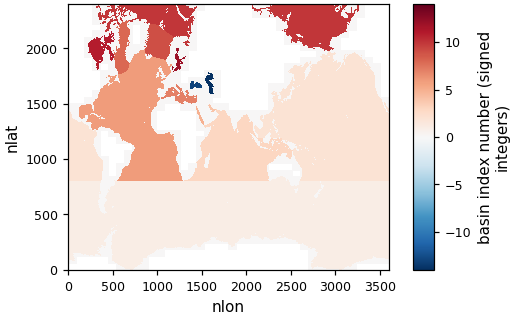

In [21]:
RMASK_ocn.where(RMASK_ocn!=-1).plot()

In [4]:
# daily ctrl data
# ctrl_SSH = xr.open_mfdataset(f'{path_ctrl}/OUTPUT/ocn/hist/daily/spinup_pd_maxcores_f05_t12.pop.hm.0204-*.nc', concat_dim='time', decode_times=False, combine='nested').SSH

In [5]:
cesm_dict = dict(concat_dim='time', decode_times=False, combine='nested')
obs_dict = dict(combine='nested', concat_dim='Time', chunks={'Latitude':96, 'Longitude':270, 'Time':73})
ctrl = xr.open_mfdataset(file_ex_ocn_ctrl[:-5]+'*.nc', **cesm_dict).mean('time')
lpd = xr.open_mfdataset(file_ex_ocn_lpd[:-5]+'*.nc', **cesm_dict).mean('time')
obs = xr.open_mfdataset(f'{path_prace}/SSH/ssh_grids_v1812_*.nc', **obs_dict)

In [22]:
# ctrl_var = ctrl.SSH2-ctrl.SSH**2
# ctrl_var = xr.where(ctrl_var<0,0,ctrl_var)   # np.absolute(ctrl_var)
ctrl_std = np.sqrt(np.abs(ctrl.SSH2-ctrl.SSH**2))
ctrl_std = ctrl_std.where(RMASK_ocn!=-1)
lpd_std = np.sqrt(lpd.SSH2-lpd.SSH**2)
obs_std = np.sqrt((obs.SLA**2).mean('Time')-obs.SLA.mean('Time')**2)

/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


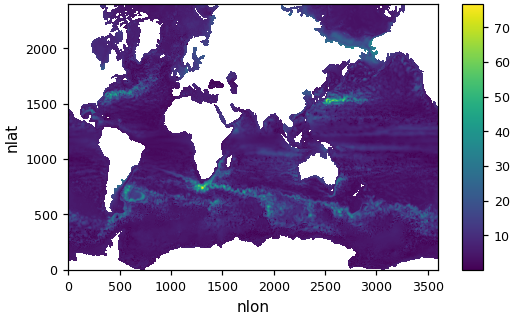

In [23]:
ctrl_std.plot()

/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


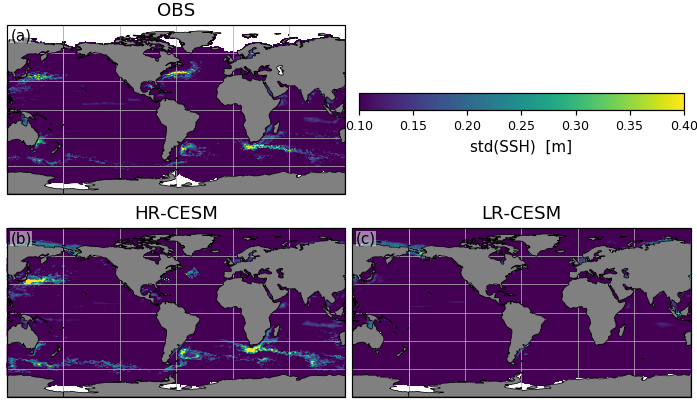

In [9]:
f = plt.figure(figsize=(6.4,3.8))
axo = f.add_axes([.01 ,.49,.485,.49], projection=ccrs.PlateCarree(central_longitude=-60))
axh = f.add_axes([.01 ,0,.485,.49], projection=ccrs.PlateCarree(central_longitude=-60))
axl = f.add_axes([.505,0,.485,.49], projection=ccrs.PlateCarree(central_longitude=-60))
# axc = f.add_axes([.51,.9,.475,.04])
axc = f.add_axes([.515,.735,.465,.04])
# axc = f.add_axes([.51,.655,.475,.04])


kw = dict(vmin=0.1, vmax=.4, cmap='viridis', transform=ccrs.PlateCarree())
axo.pcolormesh(obs_std.Longitude, obs_std.Latitude, obs_std.T, **kw)
axh.pcolormesh(ctrl.TLONG, ctrl.TLAT, ctrl_std/100, **kw)
# axo.pcolormesh(lpd.TLONG, lpd.TLAT, lpd_std/100, **kw)
# axh.pcolormesh(lpd.TLONG, lpd.TLAT, lpd_std/100, **kw)
im = axl.pcolormesh(lpd.TLONG, lpd.TLAT, lpd_std/100, **kw)
plt.colorbar(im, cax=axc, orientation='horizontal', label='std(SSH)  [m]')
for i, ax in enumerate([axo, axh, axl]):
    ax.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='black', facecolor='grey', linewidth=.5)
    ax.text(.01,.91, '('+['a','b','c'][i]+')', transform=ax.transAxes, color='k',\
            bbox=dict(ec='None', fc='w', alpha=0.5, pad=0.0))
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=.5)
    gl.ylocator = matplotlib.ticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
    ax.set_global()
    ax.set_title(['OBS','HR-CESM','LR-CESM'][i])

/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to c

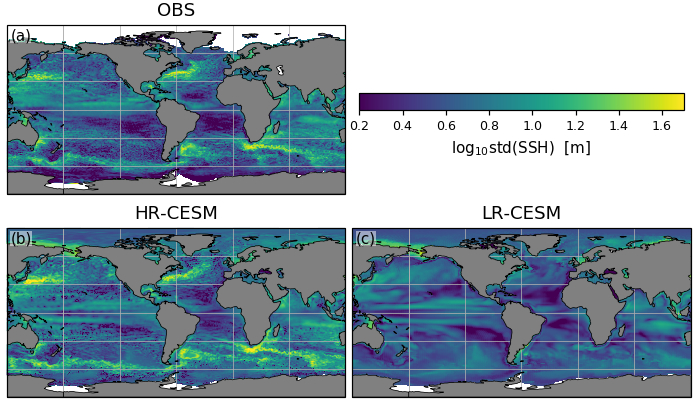

In [24]:
f = plt.figure(figsize=(6.4,3.8))
axo = f.add_axes([.01 ,.49,.485,.49], projection=ccrs.PlateCarree(central_longitude=-60))
axh = f.add_axes([.01 ,  0,.485,.49], projection=ccrs.PlateCarree(central_longitude=-60))
axl = f.add_axes([.505,  0,.485,.49], projection=ccrs.PlateCarree(central_longitude=-60))
# axc = f.add_axes([.51,.9,.475,.04])
axc = f.add_axes([.515,.735,.465,.04])
# axc = f.add_axes([.51,.655,.475,.04])


kw = dict(vmin=.2, vmax=1.7, cmap='viridis', transform=ccrs.PlateCarree())
axo.pcolormesh(obs_std.Longitude, obs_std.Latitude, np.log10(obs_std.T*100), **kw)
axh.pcolormesh(ctrl.TLONG, ctrl.TLAT, np.log10(ctrl_std), **kw)
im = axl.pcolormesh(lpd.TLONG, lpd.TLAT, np.log10(lpd_std), **kw)
plt.colorbar(im, cax=axc, orientation='horizontal', label=r'log$_{10}$std(SSH)  [m]')
for i, ax in enumerate([axo, axh, axl]):
    ax.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='black', facecolor='grey', linewidth=.5)
    ax.text(.01,.91, '('+['a','b','c'][i]+')', transform=ax.transAxes, color='k',\
            bbox=dict(ec='None', fc='w', alpha=0.5, pad=0.0))
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=.5)
    gl.ylocator = matplotlib.ticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
    ax.set_global()
    ax.set_title(['OBS','HR-CESM','LR-CESM'][i])


/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/matplotlib/colors.py:

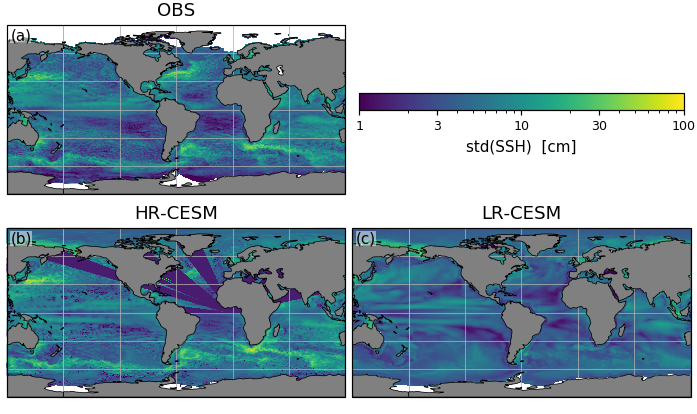

In [13]:
f = plt.figure(figsize=(6.4,3.8))
axo = f.add_axes([.01 ,.49,.485,.49], projection=ccrs.PlateCarree(central_longitude=-60))
axh = f.add_axes([.01 ,  0,.485,.49], projection=ccrs.PlateCarree(central_longitude=-60))
axl = f.add_axes([.505,  0,.485,.49], projection=ccrs.PlateCarree(central_longitude=-60))
# axc = f.add_axes([.51,.9,.475,.04])
axc = f.add_axes([.515,.735,.465,.04])
# axc = f.add_axes([.51,.655,.475,.04])


kw = dict(norm=matplotlib.colors.LogNorm(vmin=1, vmax=100), cmap='viridis', transform=ccrs.PlateCarree())
axo.pcolormesh(obs_std.Longitude, obs_std.Latitude, obs_std.T*100, **kw)
axh.pcolormesh(ctrl.TLONG, ctrl.TLAT, ctrl_std, **kw)
im = axl.pcolormesh(lpd.TLONG, lpd.TLAT, lpd_std, **kw)
cbar = plt.colorbar(im, cax=axc, orientation='horizontal', label='std(SSH)  [cm]')
cbar.ax.get_xaxis().set_ticks([1,3,10,30,100])
cbar.ax.get_xaxis().set_ticklabels([1,3,10,30,100])
for i, ax in enumerate([axo, axh, axl]):
    ax.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='black', facecolor='grey', linewidth=.5)
    ax.text(.01,.91, '('+['a','b','c'][i]+')', transform=ax.transAxes, color='k',\
            bbox=dict(ec='None', fc='w', alpha=0.5, pad=0.0))
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=.5)
    gl.ylocator = matplotlib.ticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
    ax.set_global()
    ax.set_title(['OBS','HR-CESM','LR-CESM'][i])


/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/matplotlib/colors.py:

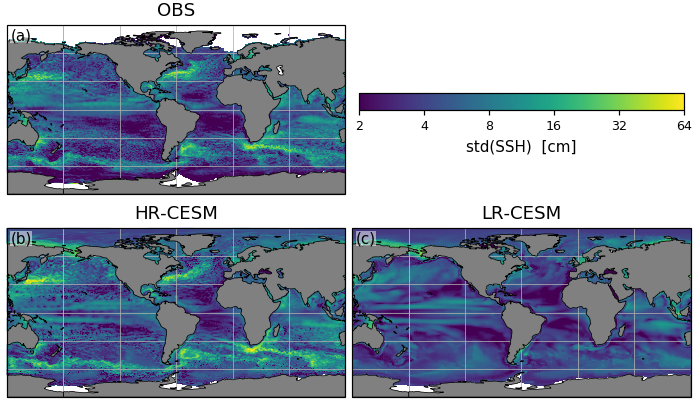

In [25]:
f = plt.figure(figsize=(6.4,3.8))
axo = f.add_axes([.01 ,.49,.485,.49], projection=ccrs.PlateCarree(central_longitude=-60))
axh = f.add_axes([.01 ,  0,.485,.49], projection=ccrs.PlateCarree(central_longitude=-60))
axl = f.add_axes([.505,  0,.485,.49], projection=ccrs.PlateCarree(central_longitude=-60))
# axc = f.add_axes([.51,.9,.475,.04])
axc = f.add_axes([.515,.735,.465,.04])
# axc = f.add_axes([.51,.655,.475,.04])

ticks = [2**x for x in range(1,7)]
kw = dict(norm=matplotlib.colors.LogNorm(vmin=2, vmax=64), cmap='viridis', transform=ccrs.PlateCarree())
axo.pcolormesh(obs_std.Longitude, obs_std.Latitude, obs_std.T*100, **kw)
axh.pcolormesh(ctrl.TLONG, ctrl.TLAT, ctrl_std, **kw)
im = axl.pcolormesh(lpd.TLONG, lpd.TLAT, lpd_std, **kw)
cbar = plt.colorbar(im, cax=axc, orientation='horizontal', label='std(SSH)  [cm]')
cbar.ax.minorticks_off()
cbar.ax.get_xaxis().set_ticks(ticks)
cbar.ax.get_xaxis().set_ticklabels(ticks)
for i, ax in enumerate([axo, axh, axl]):
    ax.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='black', facecolor='grey', linewidth=.5)
    ax.text(.01,.91, '('+['a','b','c'][i]+')', transform=ax.transAxes, color='k',\
            bbox=dict(ec='None', fc='w', alpha=0.5, pad=0.0))
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=.5)
    gl.ylocator = matplotlib.ticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
    ax.set_global()
    ax.set_title(['OBS','HR-CESM','LR-CESM'][i])

/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


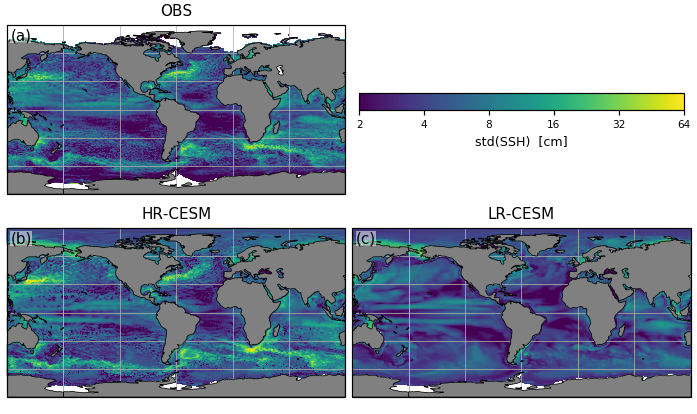

In [47]:
from obs_cesm_maps import bias_maps
from maps import add_cyclic_POP
kw = dict(lat='Latitude', lon='Longitude', label='std(SSH)  [cm]', cmap='viridis', vmin=2, vmax=64, log=True, ticks = [2**x for x in range(1,7)])
bias_maps(do=obs_std.T*100, dh=ctrl_std, dl=add_cyclic_POP(lpd_std), kw1=kw, kw2=None, fn=f'{path_results}/FW-paper/SupplFig4')